In [12]:
import json
import logging
from faster_coco_eval import Curves, ErrorCalc

logging.root.setLevel("INFO")
logging.debug("Запись.")

In [13]:
def load(file):
    with open(file) as io:
        _data = json.load(io)
        
    return _data

In [14]:
prepared_coco_in_dict = load('../tests/data/eval_all_coco.json')
prepared_anns         = load('../tests/data/result_annotations.json')

100%|██████████| 3/3 [00:00<00:00, 18.26it/s]


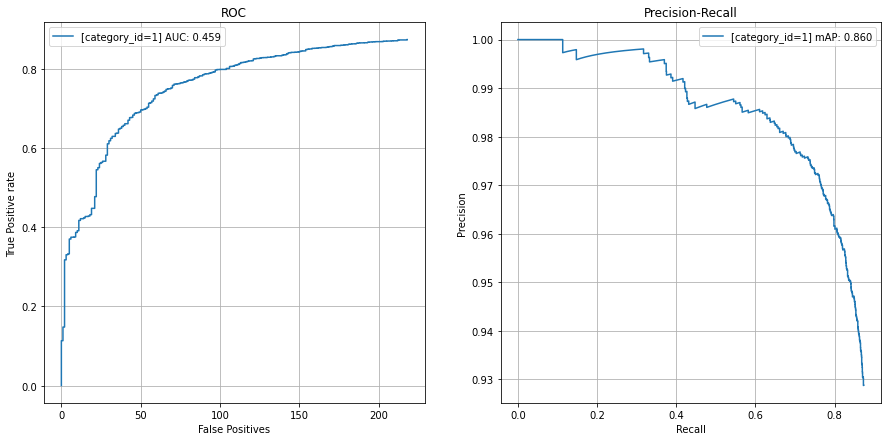

In [15]:
threshold_iou = 0.5


curves = Curves(prepared_coco_in_dict)
curves.load_result(prepared_anns)
_match_results = curves.match(categories_id=['all'])
curves.plot_curve(_match_results, threshold_iou=threshold_iou)

In [16]:
ec = ErrorCalc(prepared_coco_in_dict)
ec.load_result(prepared_anns)
confusion_matrix, result_annotations = ec.compute_errors()

100%|██████████| 3/3 [00:00<00:00, 17.58it/s]


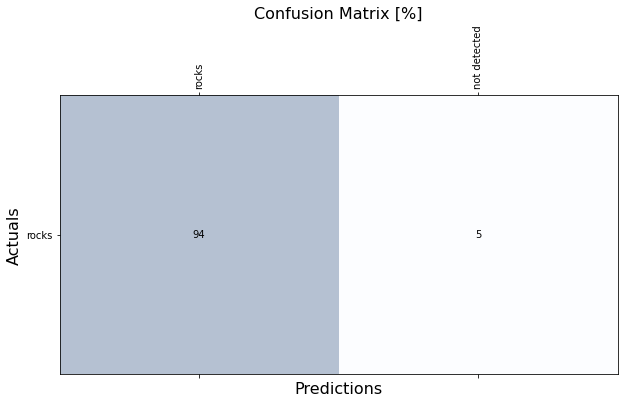

In [17]:
ec.display_matrix(confusion_matrix)